<a href="https://colab.research.google.com/github/Anagefilho/Anagefilho/blob/main/NQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fitness, anotando quando as rainhas se colidem em cada indivíduo.

In [113]:
def fitnessScore(pop,new_pop):
    fit = np.zeros([pop[:,1].size, 1],dtype=int) #Criação da array do fit do tamanho da população, a matriz contém 1 coluna com pop.size linhas.
    colide_diagonal = 0
    colide_linha = 0

    for i in range(new_pop): #for para passar em toda população atual.
        colide_linha = len(pop[i]) - len(np.unique(pop[i])) # se existir números iguais na linha as rainhas estão se colidindo horizontalmente.

        x = pop[i]
        colide_diagonal = 0

        for k in range(len(x)): # k é criado para comparar a posição da peça atual com todas peças do tabuleiro.

          for j in range(len(x)): # j criado para ser comparado com k
              if j != k:
                delta_x = abs(k - j) # diferença das colunas da peça atual k com as outras peças j
                delta_y = abs(x[k] - x[j]) # diferença entre peça atual x[k] com as outras do tabuleiro x[j]

                if(delta_x == delta_y): # quando as diferenças entre as colunas (delta_x) e a diferença entre as linhas são = 0, temos uma colisão diagonal. 
                  colide_diagonal += 1

          fit[i,0] = colide_linha + colide_diagonal

    return fit

def board(pop, n): # Desenha o tabuleiro
    board = np.zeros((n,n,3))
    board += 0.5 # Inicializa o tabuleiro com cor preta em todas as casas da matriz
    board[::2, ::2] = 1 # Cor branca de 2 em 2
    #board[1::2, 1::2] = 1 # Cor branca

    positions = pop[0,:n-1] # A melhor população

    fig, ax = plt.subplots()
    ax.imshow(board, interpolation='nearest')

    

    for y, x in enumerate(positions):
        ax.text(x, y, u'\u2655', size=15, ha='center', va='center')

    ax.set(xticks=[], yticks=[])
    ax.axis('image')
    
    plt.show()

#Crossover, cruzando os melhores pais de cada geração

In [114]:
#Cruzamento 
def crossover_single_x(pai1, pai2):
    filho1 = np.zeros([len(pai1)],dtype=int) #Inicia filhos
    filho2 = np.zeros([len(pai2)], dtype=int)
    x = random.randint(0, n)

    p11 = pai1[0:x]
    p12 = pai1[x:n]
    p21 = pai2[0:x]
    p22 = pai2[x:n]
    
    filho1 = np.hstack([p11,p22])
    filho2 = np.hstack([p21,p12])
    
    filho1 = Mutation(filho1) #Aplicando a mutação
    filho2 = Mutation(filho2)
    
    filhos = np.vstack([filho1,filho2])
    return filhos

def crossover_varios_x(pai1, pai2):
    filho1 = np.zeros([len(pai1)],dtype=int) #Inicia filhos
    filho2 = np.zeros([len(pai2)], dtype=int)
    x = int(n/4)
    y = int(n/2)
    
    p11 = pai1[0:x]
    p1m = pai1[x:y]
    p1m2 = pai1[y:x+y]
    p12 = pai1[x+y:n]

    p21 = pai2[0:x]
    p2m = pai2[x:y]
    p2m2 = pai2[y:x+y]
    p22 = pai2[x+y:n]

    filho1 = np.concatenate([p11,p2m,p2m2,p12])
    filho2 = np.concatenate([p21,p1m,p1m2,p22])
    
    filho1 = Mutation(filho1) #Aplicando a mutação 
    filho2 = Mutation(filho2)
    
    filhos = np.vstack([filho1,filho2])
    return filhos


def crossover(pai1, pai2):
    filho1 = np.zeros([len(pai1)],dtype=int) #Inicia filhos
    filho2 = np.zeros([len(pai2)], dtype=int)
    l = int(n/2*1.5) #Ponto de crossover 
    
    p11 = pai1[0:l]
    p12 = pai1[l:n]
    p21 = pai2[0:l]
    p22 = pai2[l:n]
    
    filho1 = np.hstack([p11,p22])
    filho2 = np.hstack([p21,p12])
    
    filho1 = duoMutation(filho1) #Aplicando a mutação 
    filho2 = duoMutation(filho2)
    
    filhos = np.vstack([filho1,filho2])
    print(filhos)
    return filhos

#Mutação

def Mutation(child, mutation_prob=.20): #probabilidade de mutação de 80% para dar mais diversividade ao modelo
      if(random.random() > mutation_prob):
        ind = np.random.choice(len(child), 4, replace=False)
        temp = child[ind[0]]
        child[ind[0]] = child[ind[1]]
        child[ind[1]] = temp
        return child       

      else:
        return child

def duoMutation(child, mutation_prob=.40): #probabilidade de mutação de 60% para dar mais diversividade ao modelo, porém tem a chance de ocorrer mutação dupla.
      if(random.random() > mutation_prob):
        ind = np.random.choice(len(child), 4, replace=False)
        temp = child[ind[0]]
        child[ind[0]] = child[ind[1]]
        child[ind[1]] = temp
        return child       

      elif (random.random() > 0.8):
        ind = np.random.choice(len(child), 4, replace=False)
        temp = child[ind[0]]
        temp2 = child[ind[2]]

        child[ind[0]] = child[ind[1]]
        child[ind[1]] = temp
        child[ind[2]] = temp2
        return child


#Seleção dos melhores pais da população

In [115]:
#Avaliação, checa fitness
def selecao_ranking(pop, new_pop):
    pop = pop[pop[:,n].argsort()][0:new_pop, :] #retorna uma lista com a população ordenada pelo fitting score
    return pop[0],pop[1] #pegamos os 2 melhores pais da população atual.


#Inicialização e looping

Número de rainhas:  10
Não conseguiu achar a soluçãoa ótima, a melhor foi:
Número de gerações:  998
Melhor solução:  [7 2 6 8 0 1 4 9 5 3]
Número de conflitos:  2


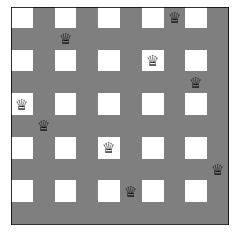

In [120]:
import sys
import random
import numpy as np 
import matplotlib.pyplot as plt

#Roteiro para criação do algoritmo genético
#Representação
#Representação por exemplo: 8 rainhas, [1 4 3 6 2 7 5 0]

# Nesse caso a fitness = número de rainhas se conflitando.  
""" 
    k = 0, j = 2
    0 - 2 = 2 
    x[k] - x[j]
    1 - 3 = 2
    colide diagonal += 1

    k = 1, j = 2
    1 - 2 = 1
    x[k] - x[j]
    4 - 3 = 1
    colide diagonal += 1

    k = 1, j = 3 
    1 - 3 = 2
    x[k] = 4, x[j] = 6
    4 - 6 = 2
    colide diagonal += 1

    fitness score = 3 nesse indivíduo.

   0 1 2 3 4 5 6 7 
0 [0 0 0 0 0 0 0 X ] 
1 [X 0 0 0 0 0 0 0 ]
2 [0 0 0 0 X 0 0 0 ]
3 [0 0 X 0 0 0 0 0 ]
4 [0 X 0 0 0 0 0 0 ]
5 [0 0 0 0 0 0 X 0 ]
6 [0 0 0 X 0 0 0 0 ]
7 [0 0 0 0 0 X 0 0 ]
"""
#Inicialização
print("Digite o número de rainhas: ")
n = int(input())
print("Número da população: ")
new_pop = int(input())
print("Número de gerações: ")
generation = int(input())

pop = np.zeros([new_pop,n],dtype=int)

for i in range(new_pop):
    pop[i, :] = np.random.permutation(n) #Inicialização da população com permutações dos númeoros de 0 até n.
print(pop)

  
fit = fitnessScore(pop,new_pop) # calcula de todos da população atual

pop = np.hstack([pop,fit]) # adiciona na ultima linha os valores de fitness de cada indivíduo da população.

pop = pop[pop[:,n].argsort()][0:new_pop, :]

#Loop

for gen in range(generation):
    
    pai1, pai2 = selecao_ranking(pop, new_pop) #Seleção dos pais por meio de ranking

    filhos = crossover_varios_x(pai1, pai2) # Crossover e mutação
    #print(filhos)
    fit_filhos = fitnessScore(filhos,2)

    filhos = np.hstack([filhos,fit_filhos])

    #print(filhos)
    pop = np.vstack([pop,filhos]) # Reinserção

    pop = pop[pop[:,n].argsort()][0:new_pop, :] # Atualiza pop pegando os melhores individuos

    result = pop[0][n]

    for i in range(new_pop): # Avaliação da população e vendo se algum indivíduo encontrou a solução ótima
      if pop[i][n] == 0:
        print("Solução ótima encontrada!!")
        print("Número de rainhas: ", n)
        print("Número de gerações p/ encontrar geração ótima: ", gen)
        print("Melhor solução: ", pop[0, 0:n])
        print("Número de conflitos: ", pop[i][n], result)
        board(pop)
        sys.exit()

#Caso não tenha encontrado 
print("Número de rainhas: ", n)
print("Não conseguiu achar a soluçãoa ótima, a melhor foi:")
print("Número de gerações: ", gen)
print("Melhor solução: ", pop[0, 0:n])
print("Número de conflitos: ", result)
board(pop, n) #figura

#Seleção

#Avaliação

#Reinserção
